# Reiman Sums Assignment
Begin by loading appropriate libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data, using head() will give you the first few columns. Renaming the columns makes them easier to use later. I also plot the data and see what it looks like.

In [2]:
data = pd.read_csv("Linear Kinematics.csv")
data.columns = ['x','y','z']

Create a real time column. Using read_csv would have created a default RangeIndex, which just runs from zero to the length of the array less 1. This can be used as frame index by accessing *data.index*.

In [3]:
frequency = 128
period = 1/frequency
runTime = 7.4
data['time'] = np.arange(len(data)) * period
data.head()

,x,y,z,time
0,-4.759033,-0.740333,9.727416,0.000000
1,-4.852203,-0.682400,9.729480,0.007812
2,-4.927156,-0.594967,9.810383,0.015625
3,-5.036732,-0.503397,9.959570,0.023438
4,-5.155873,-0.469681,10.106162,0.031250


(10.0, 30.0)

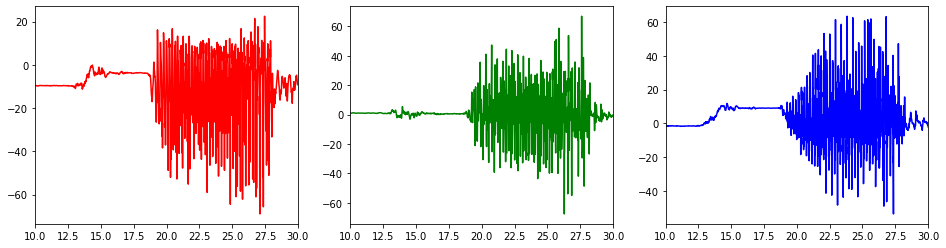

In [4]:
fig,ax = plt.subplots(1,3,figsize=(16,4), sharex=True)
ax[0].plot(data['time'],data['x'],'r')
ax[1].plot(data['time'],data['y'],'g')
ax[2].plot(data['time'],data['z'],'b')
ax[0].set_xlim(10,30)

## Start analyzing
Remove offset from Z,  plot as an example

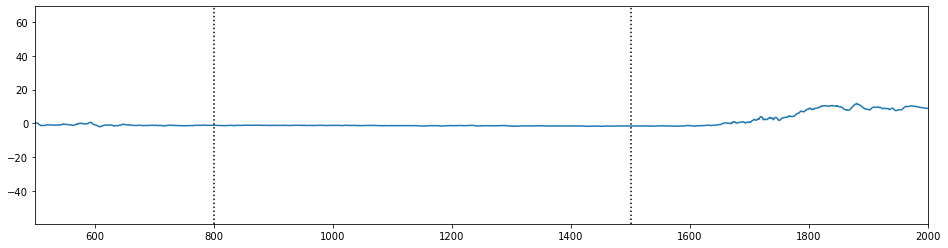

In [5]:
fig, ax = plt.subplots(1,figsize=(16,4))
ax.plot(data['z'])
ax.set_xlim(500,2000)
ax.axvline(800,color='k',linestyle=':')
ax.axvline(1500,color='k',linestyle=':')

Find the offset

(2000.0, 4000.0)

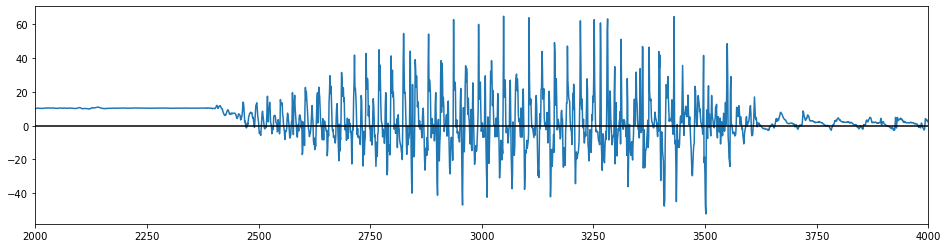

In [6]:
data['z'] = data['z']-data['z'].iloc[800:1500].mean()

fig, ax = plt.subplots(1,figsize=(16,4))
ax.plot(data['z'])
ax.axhline(0, color='k') # draw a horizotal line at zero
ax.set_xlim(2000,4000)

Use a threshold value to find the starting point of the sprint. The start will be the minimum index where a condition is met. Uisng brackets as here you can get only matching values, and then return the smallest one.

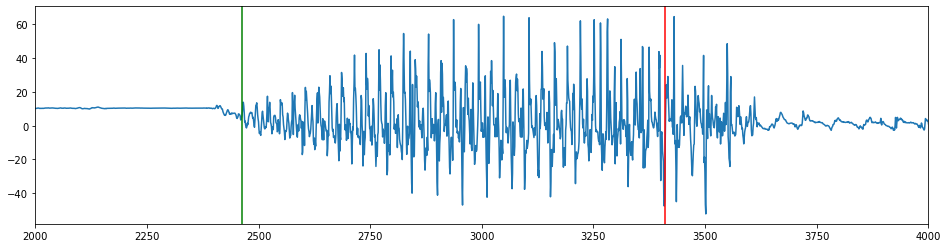

In [7]:
start = data.index[data['z'].diff()>2].min() # use a threshold
end = start + int(runTime * frequency) # runtime at end

f,a=plt.subplots(1,figsize=(16,4))
a.plot(data['z'])
a.set_xlim(2000,4000)
a.axvline(start,color='g')
a.axvline(end,color='r')

## Crop the data.

In [8]:
data = data[start:end].reset_index(drop=True)

Set up some columns for our integration sums

In [9]:
data['leftR'] = 0
data['rightR'] = 0
data['trap'] = 0

Calculate the Reimann Values. The average of previous two is captured by using 'shift' - I am using the 'loc' indexer here to assign as it is more efficient. You can do it the easy way, using standard brackets assignment e.g. this[key] = that, but it will give you an warning, and it will become an issue when big data happens.

In [22]:
data.loc[:len(data)-2,'leftR'] = np.zeros(len(data)-1) + (data['z'].values[:-1] * period).cumsum()/2
data.loc[1:,'rightR'] = np.zeros(len(data)-1) + (data['z'].values[1:] * period).cumsum()/2
data['trap'] = np.zeros(len(data)) + (0.5*(data['leftR']+data['rightR'].shift(1))) 
data['trapDisplacement'] = data['trap'].cumsum()/frequency


In [23]:
data.head() # peer into the first few rows of data 

,x,y,z,time,leftR,rightR,trap,trapDisplacement
0,-15.513796,13.725449,8.655511,19.250000,0.033811,0.000000,NaN,NaN
1,-17.486446,9.141046,13.872738,19.257812,0.088001,0.054190,0.044000,0.000344
2,-15.206782,1.957394,13.825680,19.265625,0.142008,0.108197,0.098099,0.001110
3,-9.043368,-2.500314,11.548249,19.273438,0.187118,0.153307,0.147657,0.002264
4,0.683325,-3.295125,7.574909,19.281250,0.216707,0.182897,0.185007,0.003709


## Plot Velocity and Displacement

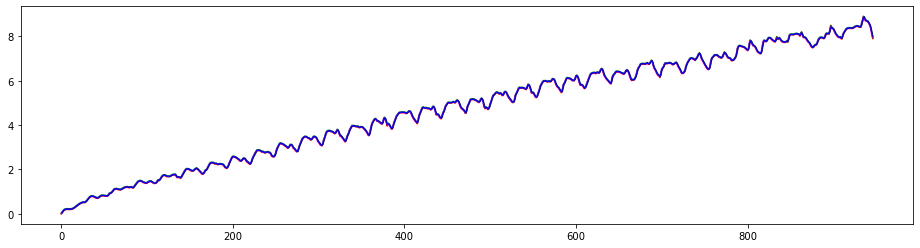

In [24]:
f,a=plt.subplots(1,figsize=(16,4))
a.plot(data['leftR'],'g')
a.plot(data['rightR'],'r')
a.plot(data['trap'],'b')

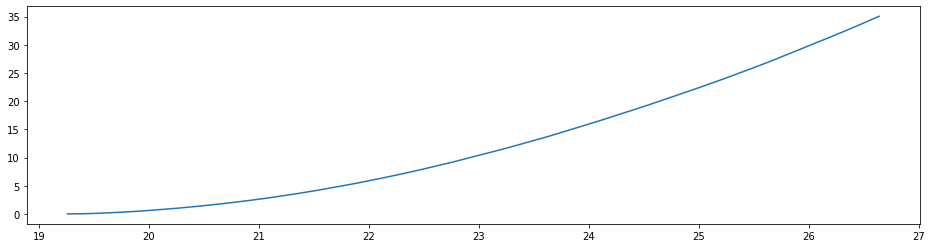

In [25]:
f,a=plt.subplots(1,figsize=(16,4))
a.plot(data['time'],(data['trapDisplacement']))

In [28]:
# peak velocity
np.nanmax(data['trap'])

8.869710997198649

In [29]:
# final velocity
data['trap'].iloc[-1]

7.988314982458139

In [30]:
# total displacement
data['trapDisplacement'].iloc[-1]

35.049702145375335